In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [106]:
df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')


In [107]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [108]:
df.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4/17/2018,West,1034,0.28,165.44,Tamil Nadu


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [110]:
df.nunique()

,0
Order ID,9994
Customer Name,50
Category,7
Sub Category,23
City,24
Order Date,1236
Region,5
Sales,1989
Discount,26
Profit,8380


In [111]:
df.isna().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


In [112]:
(df.isna().sum()/len(df))*100

,0
Order ID,0.0
Customer Name,0.0
Category,0.0
Sub Category,0.0
City,0.0
Order Date,0.0
Region,0.0
Sales,0.0
Discount,0.0
Profit,0.0


In [113]:
df = df.drop(['Order ID'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  9994 non-null   object 
 1   Category       9994 non-null   object 
 2   Sub Category   9994 non-null   object 
 3   City           9994 non-null   object 
 4   Order Date     9994 non-null   object 
 5   Region         9994 non-null   object 
 6   Sales          9994 non-null   int64  
 7   Discount       9994 non-null   float64
 8   Profit         9994 non-null   float64
 9   State          9994 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 780.9+ KB


In [114]:
df.duplicated().sum()

0

In [115]:
df.drop_duplicates(inplace=True)

In [116]:
df.Category.unique()

array(['Oil & Masala', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks', 'Eggs, Meat & Fish'], dtype=object)

In [117]:
df.Category.nunique()

7

In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,1496.596158,577.559036,500.00,1000.0000,1498.00,1994.7500,2500.00
Discount,9994.0,0.226817,0.074636,0.10,0.1600,0.23,0.2900,0.35
Profit,9994.0,374.937082,239.932881,25.25,180.0225,320.78,525.6275,1120.95


In [119]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer Name,9994,50,Amrish,227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,9994,7,Snacks,1514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub Category,9994,23,Health Drinks,719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9994,24,Kanyakumari,459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,9994,1236,09-05-2017,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,9994,5,West,3203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,9994.0,NaN,NaN,NaN,1496.596158,577.559036,500.0,1000.0,1498.0,1994.75,2500.0
Discount,9994.0,NaN,NaN,NaN,0.226817,0.074636,0.1,0.16,0.23,0.29,0.35
Profit,9994.0,NaN,NaN,NaN,374.937082,239.932881,25.25,180.0225,320.78,525.6275,1120.95
State,9994,1,Tamil Nadu,9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
cat_cols=df.select_dtypes(include='object').columns
num_cols=df.select_dtypes(include='number').columns
print(cat_cols)
print(num_cols)

Index(['Customer Name', 'Category', 'Sub Category', 'City', 'Order Date',
       'Region', 'State'],
      dtype='object')
Index(['Sales', 'Discount', 'Profit'], dtype='object')


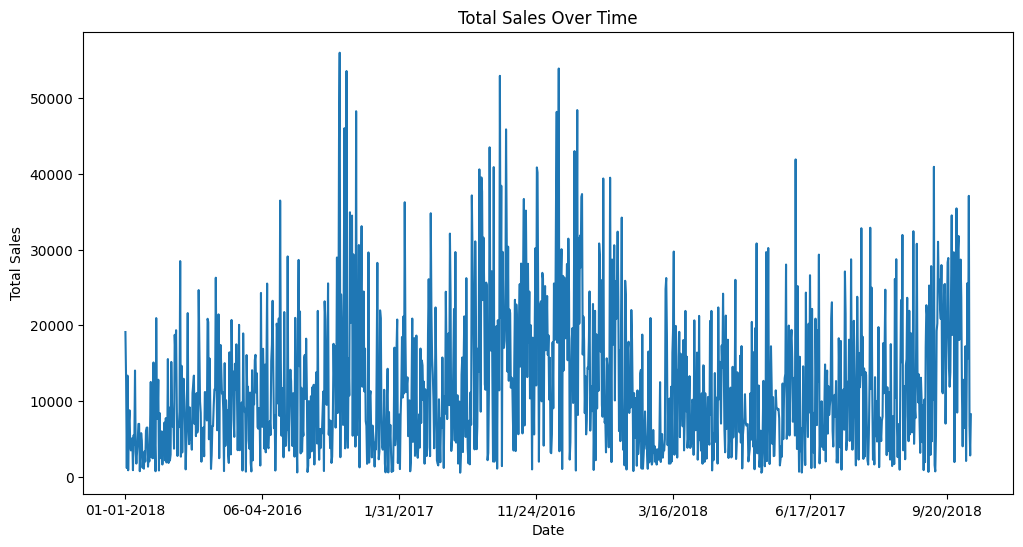

In [121]:
#Sales Trends Over Time
plt.figure(figsize=(12, 6))
df.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

Text(0, 0.5, 'Sales')

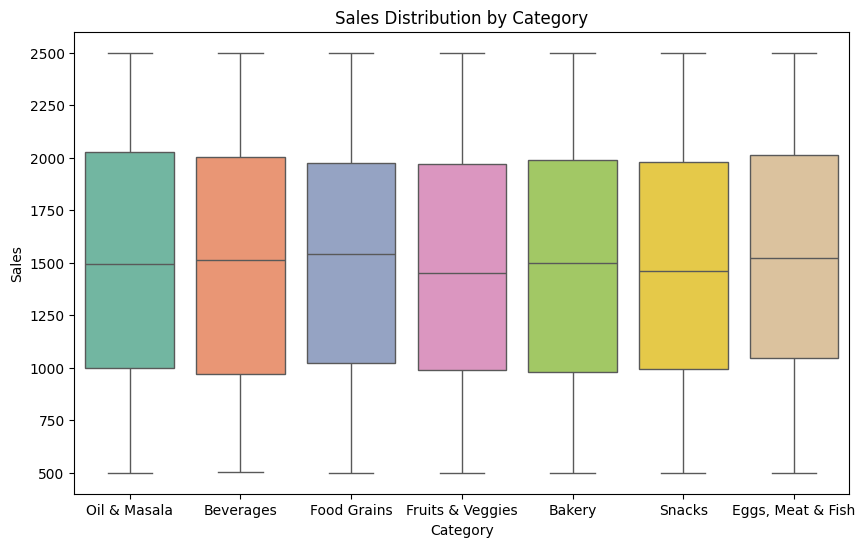

In [122]:
##Distribution of Sales by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')

Sales
Skew : 0.0


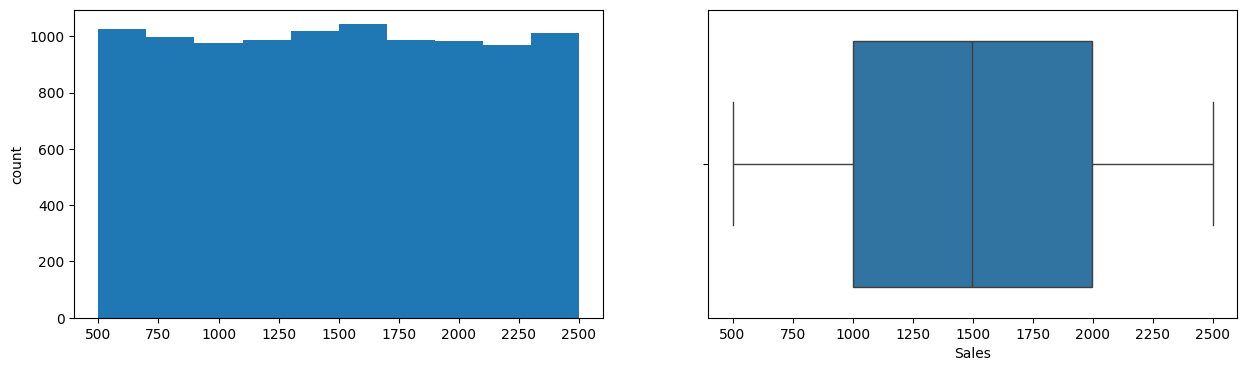

Discount
Skew : -0.03


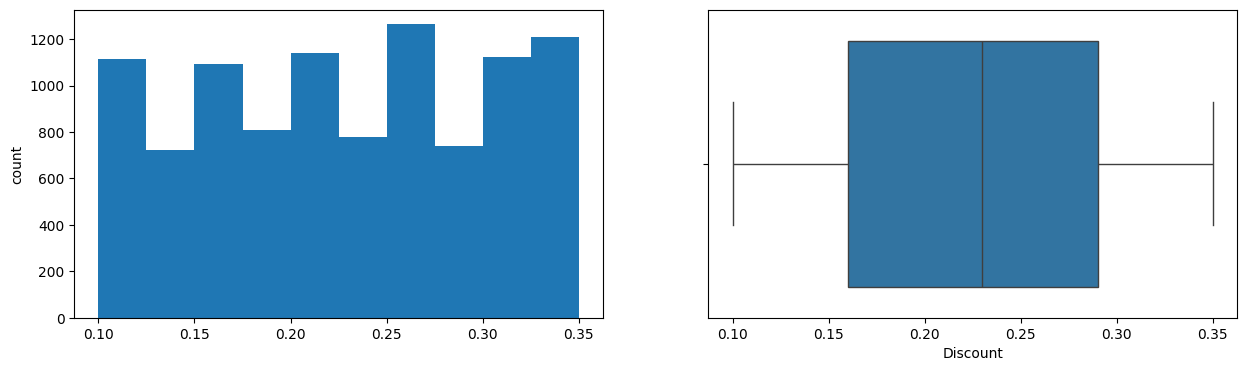

Profit
Skew : 0.77


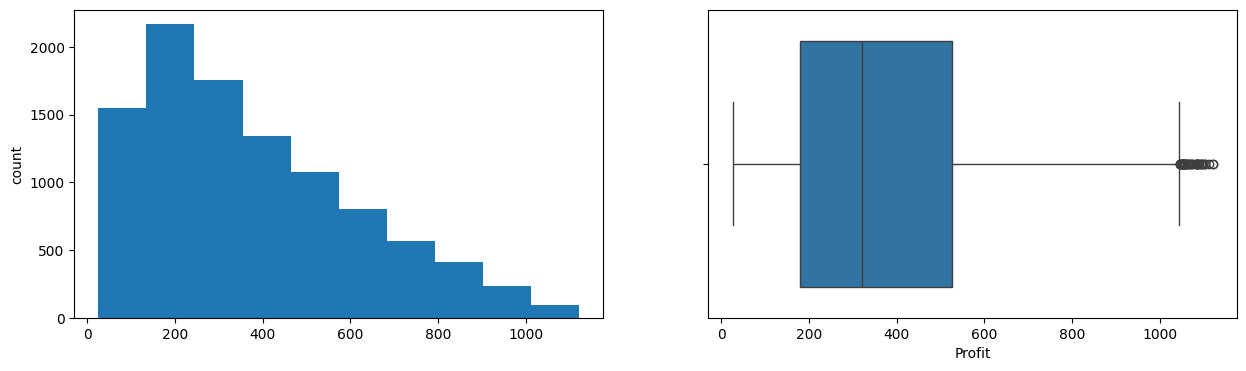

In [123]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  9994 non-null   object 
 1   Category       9994 non-null   object 
 2   Sub Category   9994 non-null   object 
 3   City           9994 non-null   object 
 4   Order Date     9994 non-null   object 
 5   Region         9994 non-null   object 
 6   Sales          9994 non-null   int64  
 7   Discount       9994 non-null   float64
 8   Profit         9994 non-null   float64
 9   State          9994 non-null   object 
 10  Sales_log      9994 non-null   float64
 11  Profit_log     9994 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 937.1+ KB


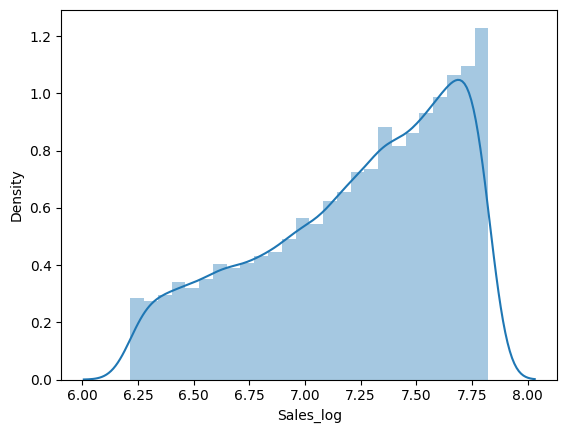

In [124]:
# Function for log transformation of the column
def log_transform(df,col):
    for colname in col:
        if (df[colname] == 1.0).all():
            df[colname + '_log'] = np.log(df[colname]+1)
        else:
            df[colname + '_log'] = np.log(df[colname])
    df.info()

log_transform(df,['Sales','Profit'])
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(df["Sales_log"], axlabel="Sales_log");

<Figure size 1200x600 with 0 Axes>

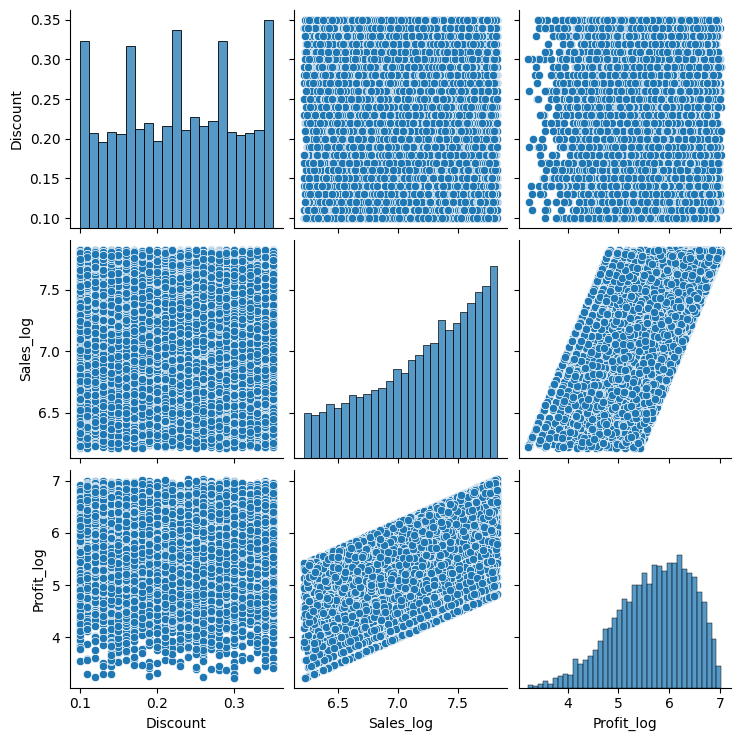

In [125]:
plt.figure(figsize=(12,6))
sns.pairplot(data=df.drop(['Sales','Profit'],axis=1))
plt.show()

In [126]:
df['Category'].value_counts()

,count
Category,
Snacks,1514
"Eggs, Meat & Fish",1490
Fruits & Veggies,1418
Bakery,1413
Beverages,1400
Food Grains,1398
Oil & Masala,1361


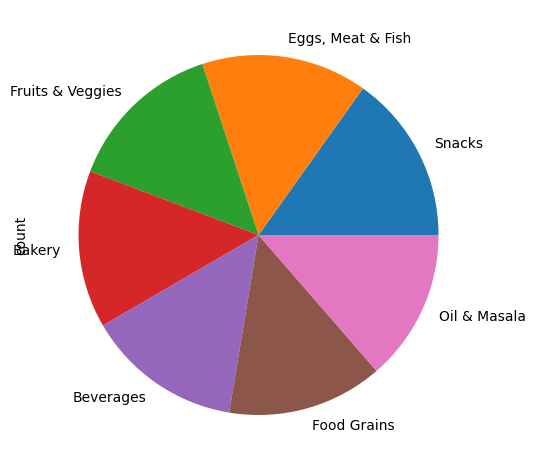

In [127]:
df['Category'].value_counts().plot.pie()
plt.tight_layout()
plt.show()

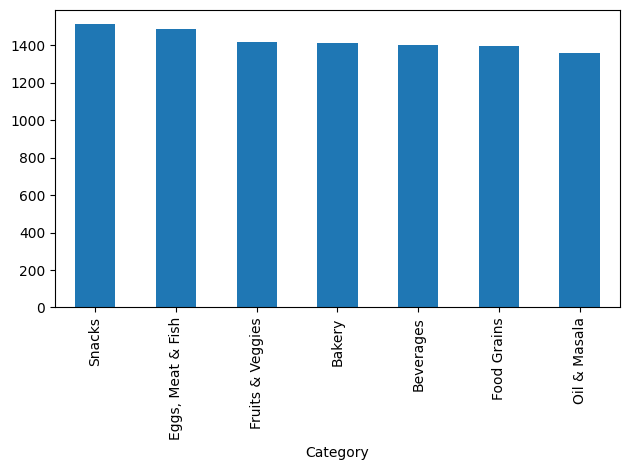

In [128]:
df['Category'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

In [129]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'],errors="coerce")

# Extract day, month, and year from 'Order Date'
df['Day'] = df['Order Date'].dt.day
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

In [130]:
# Initialize the label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encode categorical variables
df['Category'] = le.fit_transform(df['Category'])
df['Sub Category'] = le.fit_transform(df['Sub Category'])
df['City'] = le.fit_transform(df['City'])
df['Region'] = le.fit_transform(df['Region'])
df['State'] = le.fit_transform(df['State'])
df['Month'] = le.fit_transform(df['Month'])

In [131]:
# Display the first few rows after encoding
print(df.head())

  Customer Name  Category  Sub Category  City Order Date  Region  Sales  \
0        Harish         5            14    21 2017-11-08       2   1254   
1         Sudha         1            13     8 2017-11-08       3    749   
2       Hussain         3             0    13 2017-06-12       4   2360   
3       Jackson         4            12     4 2016-10-11       3    896   
4       Ridhesh         3            18    12 2016-10-11       3   2355   

   Discount  Profit  State  Sales_log  Profit_log   Day  Month    Year  
0      0.12  401.28      0   7.134094    5.994659   8.0     10  2017.0  
1      0.18  149.80      0   6.618739    5.009301   8.0     10  2017.0  
2      0.21  165.20      0   7.766417    5.107157  12.0      5  2017.0  
3      0.25   89.60      0   6.797940    4.495355  11.0      9  2016.0  
4      0.26  918.45      0   7.764296    6.822687  11.0      9  2016.0  


In [135]:
# Select features and target variable
features = df.drop(columns=['Customer Name',
'Order Date', 'Sales', 'Month'])
target = df['Sales']

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [137]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)

In [138]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
# Initialize the model
model = LinearRegression()

In [150]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train
X_train = imputer.fit_transform(X_train)
X_test=imputer.transform(X_test)

# Train the model with the imputed data
model.fit(X_train, y_train)

LinearRegression()

In [151]:
# Make predictions
y_pred = model.predict(X_test)

In [152]:
model.score(X_train,y_train)

0.9645758442875445

In [153]:
# Calculate MSE and R-squared
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 11702.969340439184
R-squared: 0.9645167371640715


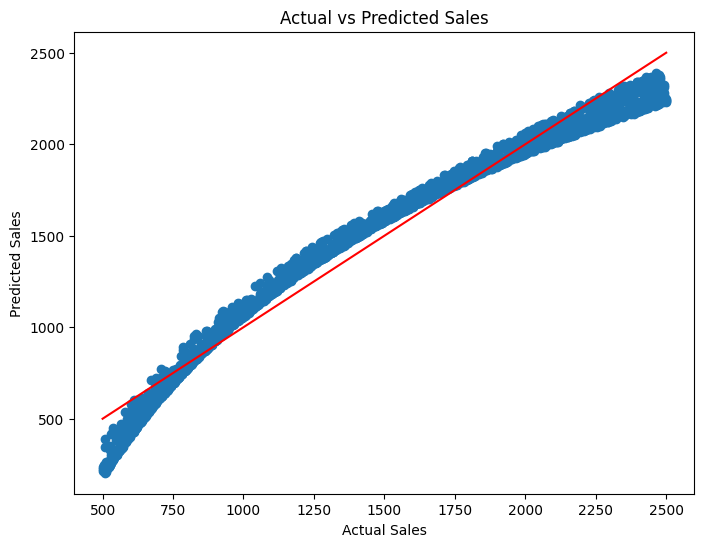

In [148]:
#Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [149]:
model.score(X_test,y_test)

0.9645167371640715